In [1]:
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
import torch
from os import listdir
from os.path import isfile, join
import numpy as np

In [2]:
im = Image.open('Rspectrograms/Exhalation_20210427055046_PPCU_HHE_CN_--.png')

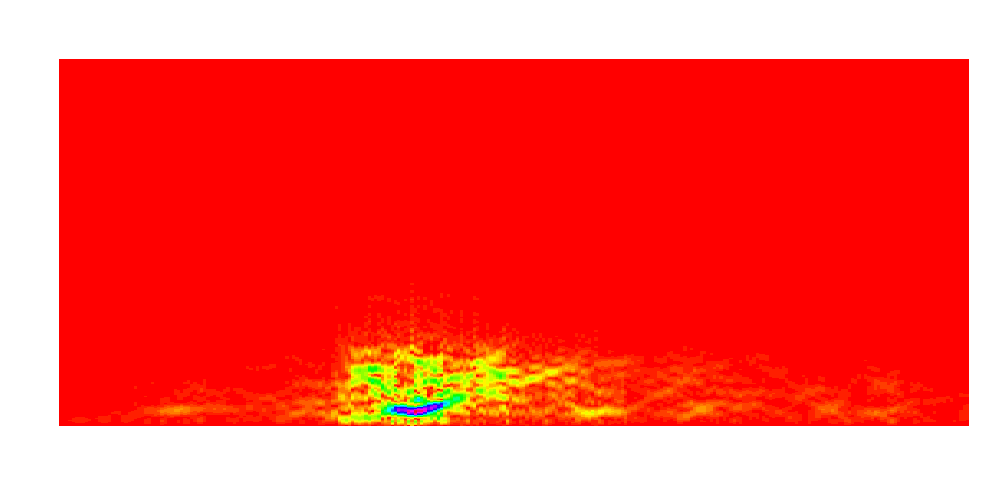

In [3]:
im

In [4]:
array = np.array(im)
array.shape

(500, 1000)

In [5]:
array = np.array(im.convert("RGB")) 
array.shape

(500, 1000, 3)

In [25]:
array.dtype

dtype('uint8')

## Data set from spectrogram images

In [6]:
PATH = 'Rspectrograms/' # where spectrograms are located
LABELS = {'Exh': 0, 'Exp': 1, 'Tre': 2, 'VTs':3} 
# key: first three letters of the file name, value: label 

read_image = lambda file: Image.open(os.path.join(PATH, file))
get_label = lambda file_name: LABELS.get(file_name[0:3]) 

class LabeledSpectrograms(Dataset):
    def __init__(self):
        files = [f for f in listdir(PATH) if isfile(join(PATH, f))] # list of file names 
        images = list(map(read_image, files))
        y = list(map(get_label, files))
        self.X = images
        self.Y = y
        
    def __len__(self):
        return len(self.Y)
    
    def __getitem__(self, index):
        x = self.X[index].convert("RGB")
        x = torch.tensor(np.array(x, dtype=np.float64))
        y = torch.tensor(float(self.Y[index]))
        return x, y
        

In [7]:
dataset = LabeledSpectrograms()

In [36]:
dataloader = DataLoader(dataset, shuffle=True)
dataloader_it = iter(dataloader)
X, Y = next(dataloader_it)

In [40]:
X.shape

torch.Size([1, 500, 1000, 3])

### Plot image from the data set

In [37]:
X_np = X.cpu().detach().numpy()[0]
X_np = X_np.astype('uint8') 
Y_np = Y.cpu().detach().numpy()[0]

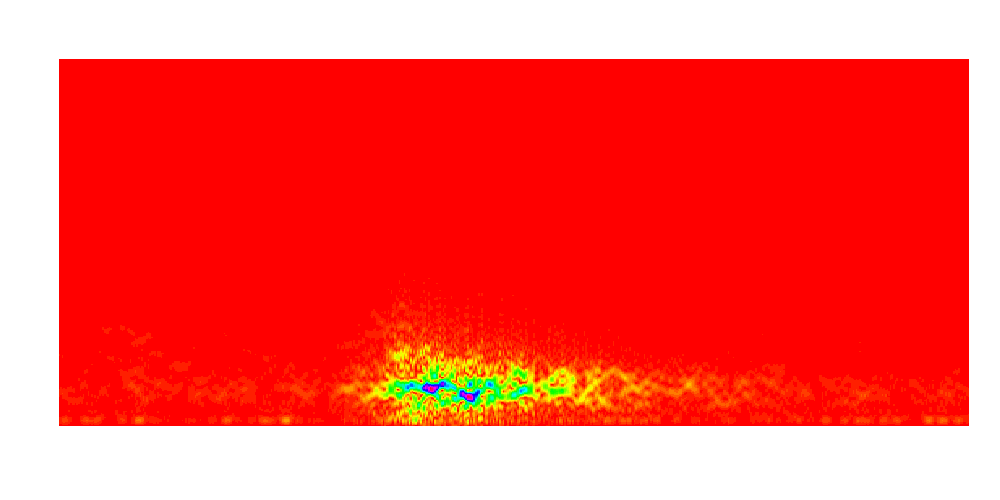

In [38]:
img = Image.fromarray(X_np, 'RGB')
key = next((k for k in LABELS.keys() if LABELS[k] == int(Y_np)), None)
img

In [39]:
print('class: '+key)

class: Exh
